# Testing Visualizations for Professional Output

This notebook tests the visualization module to generate graphs suitable for the **professional** output level.

**Professional Output Goals:**
- All 5 KPI distributions with percentile markers
- Success probability metrics
- Individual KPI charts for detailed analysis
- Comprehensive 6-panel dashboard
- Base64-encoded images for API responses

In [1]:
# Setup: Import required modules
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add Indicator Modules to path
indicator_modules_path = Path.cwd() / "Indicator Modules"
sys.path.insert(0, str(indicator_modules_path))

from simulation_engine import run_simulation
from indicator_outputs import get_point_forecast, get_distribution_summary
from visualizations import (
    plot_indicator_distribution,
    plot_success_probabilities,
    plot_all_indicators,
    compare_indicators
)

print("✓ All modules imported successfully")

✓ All modules imported successfully


## Step 1: Run Monte Carlo Simulation

Generate sample data using realistic parameters for a home renovation project.

In [2]:
# Test parameters for a typical home renovation project
test_params = {
    "capex": 60000,                      # €60k investment
    "annual_maintenace_cost": 2000,      # €2k/year maintenance
    "annual_energy_savings": 27400,      # 27,400 kWh/year savings
    "project_lifetime": 20,              # 20 year horizon
    "loan_amount": 25000,                # €25k loan
    "loan_term": 15,                     # 15 year term
    "loan_rate": None,                   # Use market rates
    "n_sims": 10000,                     # 10,000 simulations
    "seed": 42                           # Reproducibility
}

print("Running Monte Carlo simulation with parameters:")
for key, value in test_params.items():
    print(f"  {key}: {value}")

# Run simulation
results = run_simulation(**test_params)

print("\n✓ Simulation complete!")
print(f"  Generated {results['metadata']['n_sims']:,} scenarios")
print(f"  Calculated {len(results['raw_data'])} indicators")

Running Monte Carlo simulation with parameters:
  capex: 60000
  annual_maintenace_cost: 2000
  annual_energy_savings: 27400
  project_lifetime: 20
  loan_amount: 25000
  loan_term: 15
  loan_rate: None
  n_sims: 10000
  seed: 42

✓ Simulation complete!
  Generated 10,000 scenarios
  Calculated 5 indicators


## Step 2: Check Summary Statistics

Verify the simulation produced valid results.

In [3]:
# Display summary statistics for each indicator
print("📊 SUMMARY STATISTICS\n" + "="*60)

for indicator in ['IRR', 'NPV', 'PBP', 'DPP', 'ROI']:
    dist_summary = get_distribution_summary(results, indicator)
    point = get_point_forecast(results, indicator, 'median')
    
    print(f"\n{indicator}:")
    print(f"  P10: {dist_summary['P10']:.3g}")
    print(f"  P50: {dist_summary['P50']:.3g} (median)")
    print(f"  P90: {dist_summary['P90']:.3g}")
    print(f"  Mean: {dist_summary['mean']:.3g}")
    print(f"  Std: {dist_summary['std']:.3g}")

# Success probabilities
print("\n\n🎯 SUCCESS PROBABILITIES\n" + "="*60)
probs = results['summary']['probabilities']
for key, value in probs.items():
    print(f"  {key}: {value:.2%}")

📊 SUMMARY STATISTICS

IRR:
  P10: 0.0822
  P50: 0.0875 (median)
  P90: 0.0928
  Mean: 0.0875
  Std: 0.00412

NPV:
  P10: 6.17e+03
  P50: 1.57e+04 (median)
  P90: 2.81e+04
  Mean: 1.65e+04
  Std: 8.83e+03

PBP:
  P10: 10.3
  P50: 10.9 (median)
  P90: 11.4
  Mean: 10.9
  Std: 0.415

DPP:
  P10: 12.6
  P50: 14.5 (median)
  P90: 16.9
  Mean: 14.7
  Std: 1.68

ROI:
  P10: 1.48
  P50: 1.57 (median)
  P90: 1.66
  Mean: 1.57
  Std: 0.0718


🎯 SUCCESS PROBABILITIES
  Pr(NPV > 0): 98.88%
  Pr(PBP < 20y): 100.00%
  Pr(DPP < 20y): 98.88%


## Step 3: Individual KPI Distribution Plots

Generate individual charts for each financial indicator. These show the full distribution with P10/P50/P90 markers.

Generating NPV distribution chart...


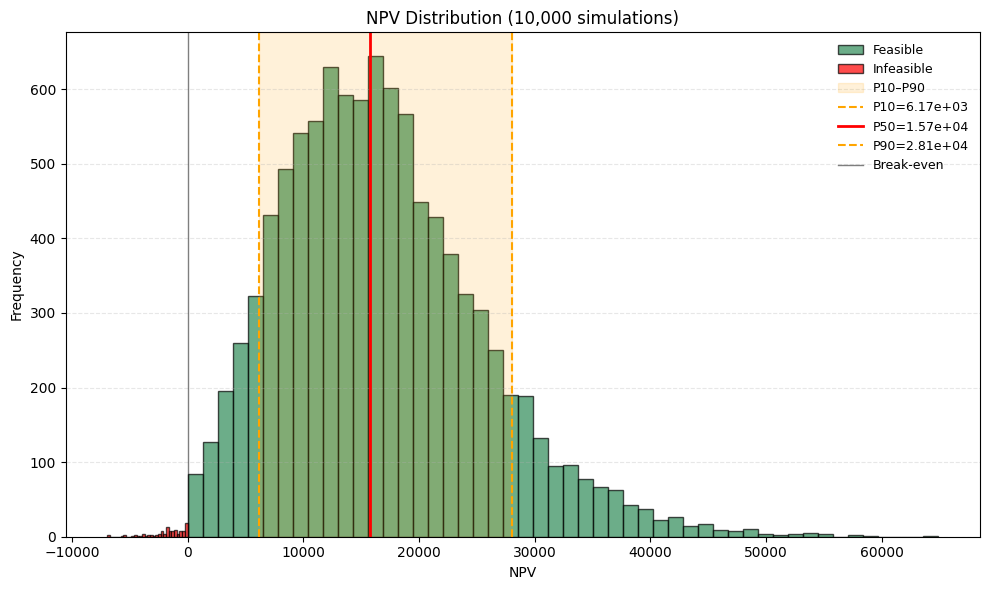

In [4]:
# NPV Distribution
print("Generating NPV distribution chart...")
plot_indicator_distribution(results, 'NPV', figsize=(10, 6), color='seagreen')
plt.show()

Generating IRR distribution chart...


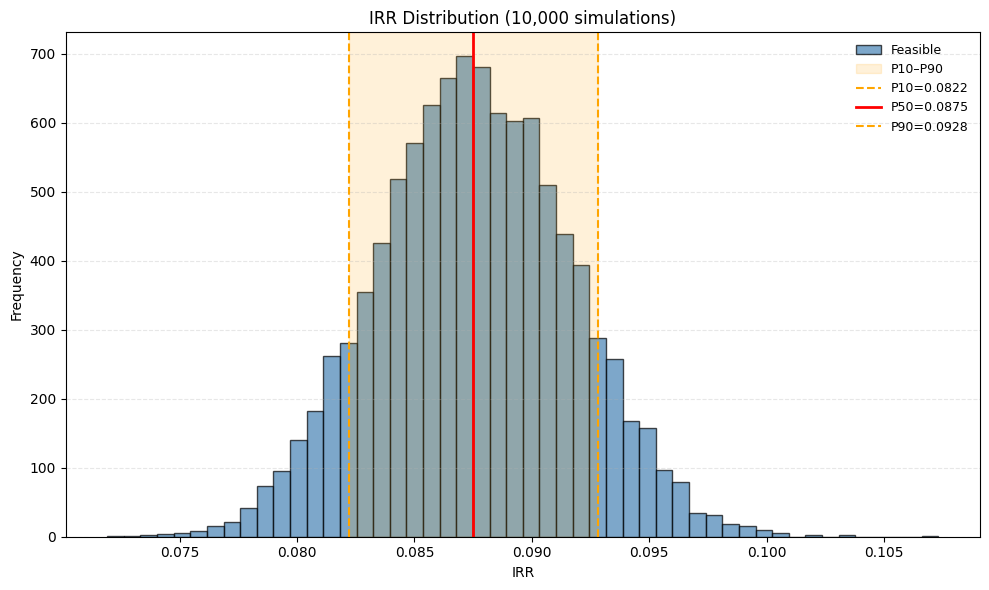

In [5]:
# IRR Distribution
print("Generating IRR distribution chart...")
plot_indicator_distribution(results, 'IRR', figsize=(10, 6), color='steelblue')
plt.show()

Generating ROI distribution chart...


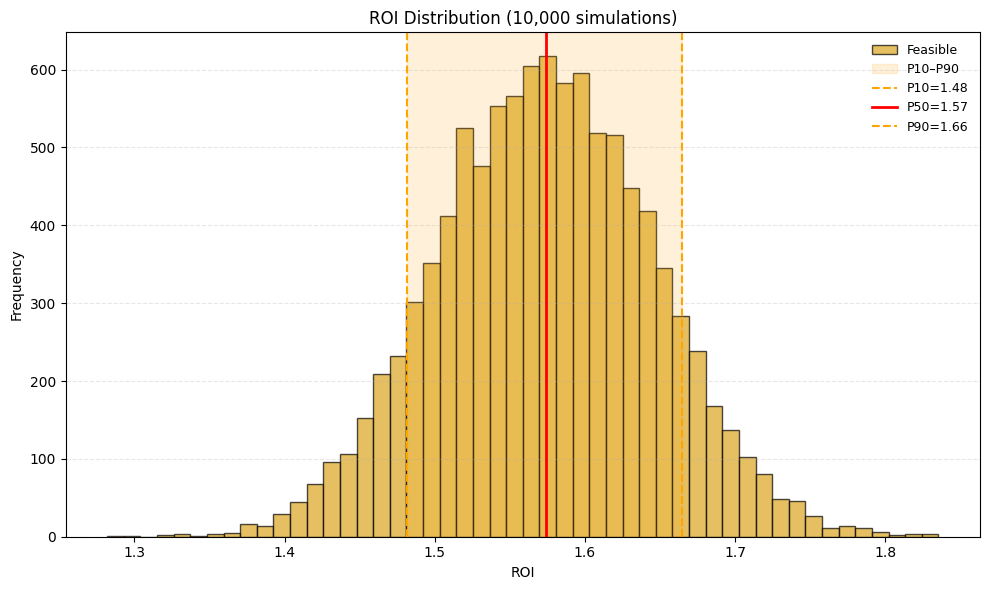

In [6]:
# ROI Distribution
print("Generating ROI distribution chart...")
plot_indicator_distribution(results, 'ROI', figsize=(10, 6), color='goldenrod')
plt.show()

Generating PBP distribution chart...


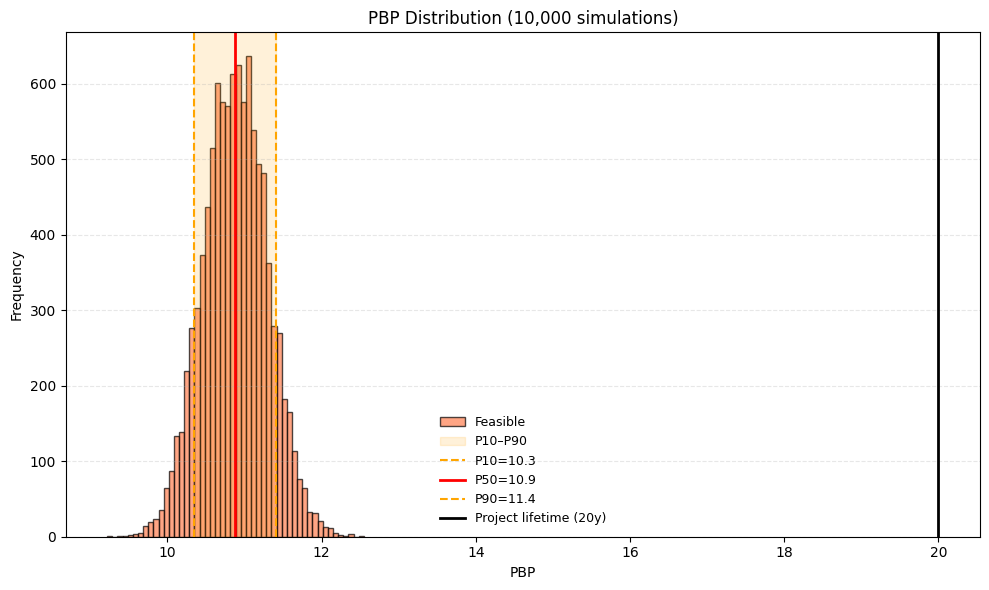

In [7]:
# PBP Distribution (Payback Period)
print("Generating PBP distribution chart...")
plot_indicator_distribution(results, 'PBP', figsize=(10, 6), color='coral')
plt.show()

Generating DPP distribution chart...


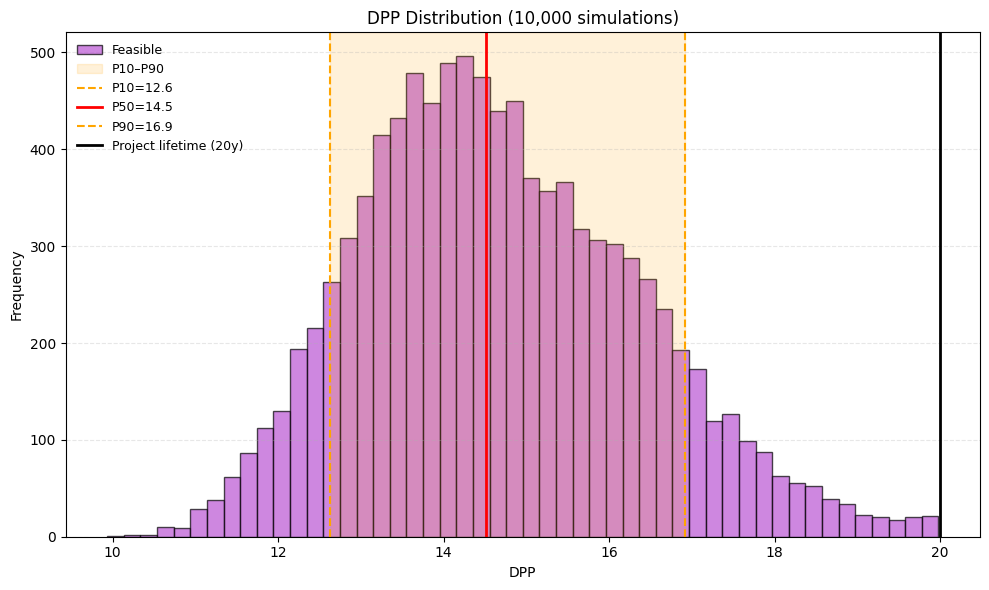

In [8]:
# DPP Distribution (Discounted Payback Period)
print("Generating DPP distribution chart...")
plot_indicator_distribution(results, 'DPP', figsize=(10, 6), color='mediumorchid')
plt.show()

## Step 4: Success Probabilities Chart

Bar chart showing the probability of achieving positive outcomes.

Generating success probabilities chart...


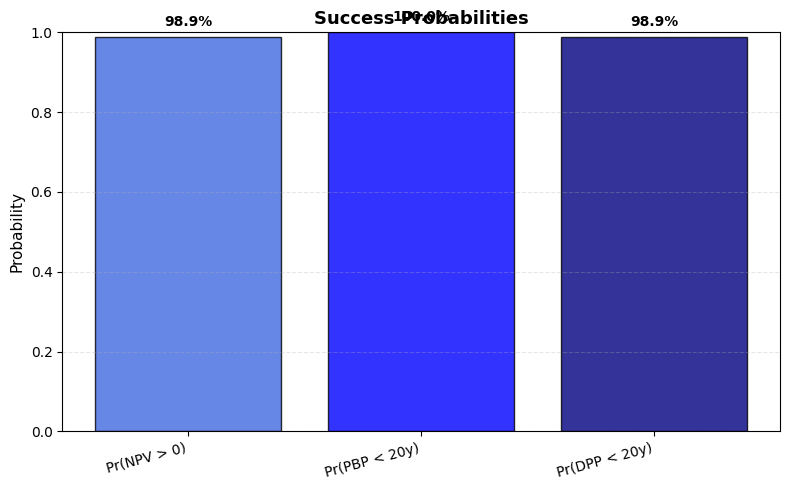

In [9]:
# Success Probabilities
print("Generating success probabilities chart...")
plot_success_probabilities(results, figsize=(8, 5))
plt.show()

## Step 5: Comprehensive Dashboard

6-panel view showing all 5 KPIs + success probabilities. This is the main visualization for professional users.

Generating comprehensive dashboard...


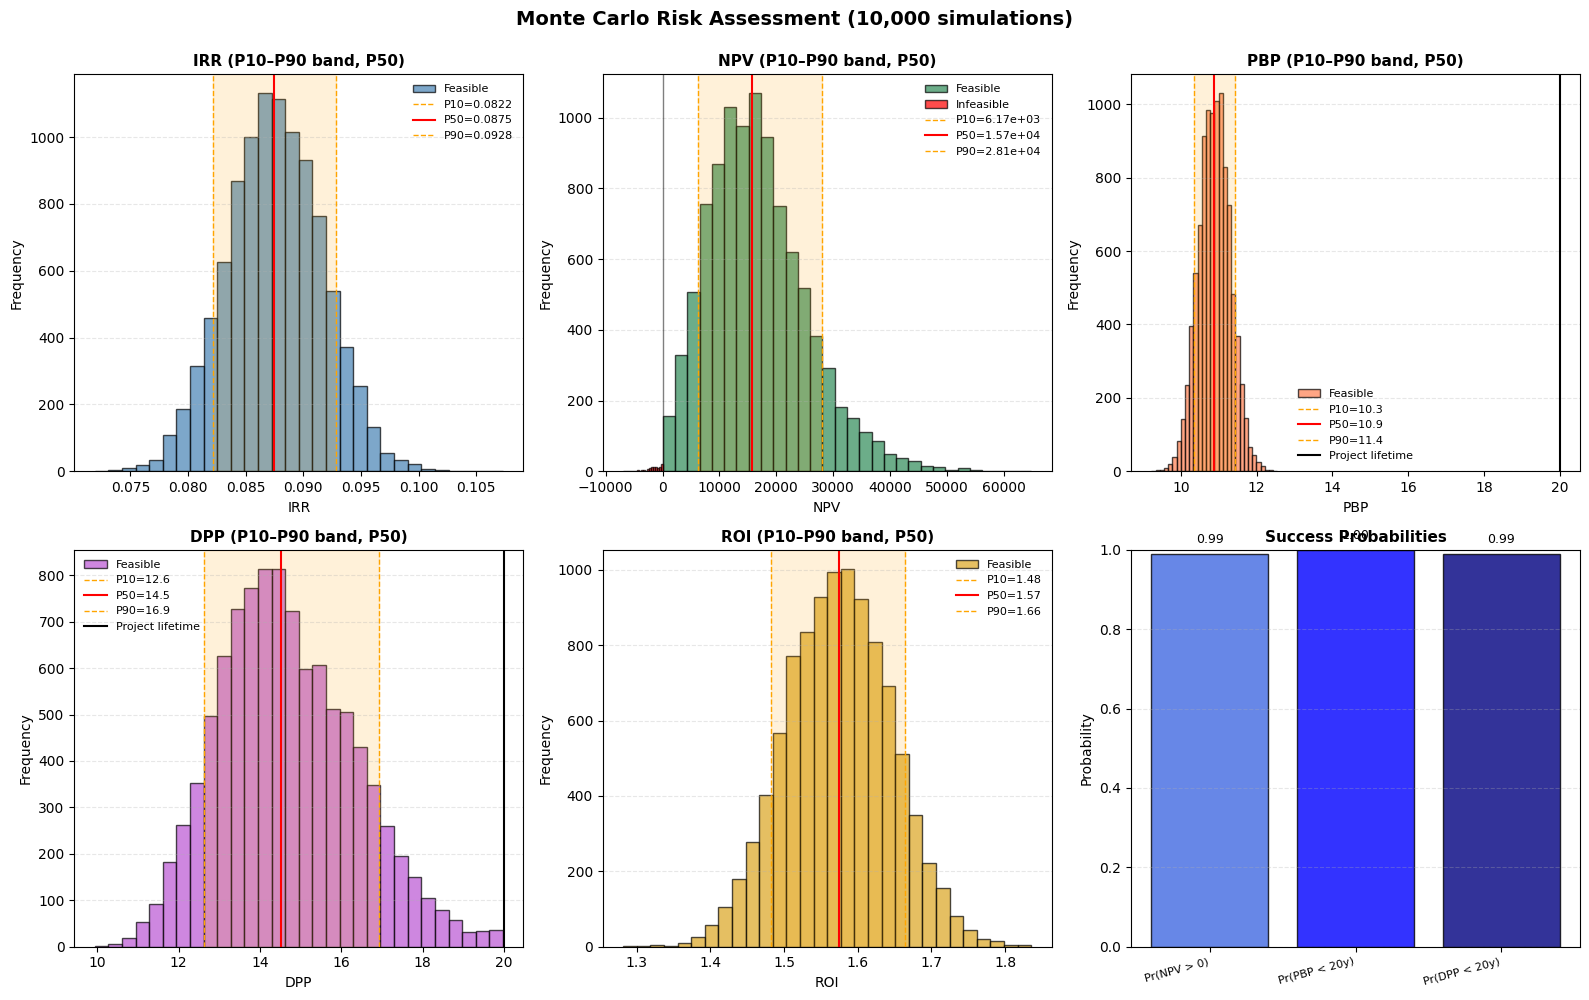

In [10]:
# Comprehensive 6-panel dashboard
print("Generating comprehensive dashboard...")
plot_all_indicators(results, figsize=(16, 10))
plt.show()

## Step 6: Compare Selected Indicators

Side-by-side comparison of related metrics.

Comparing profitability metrics...


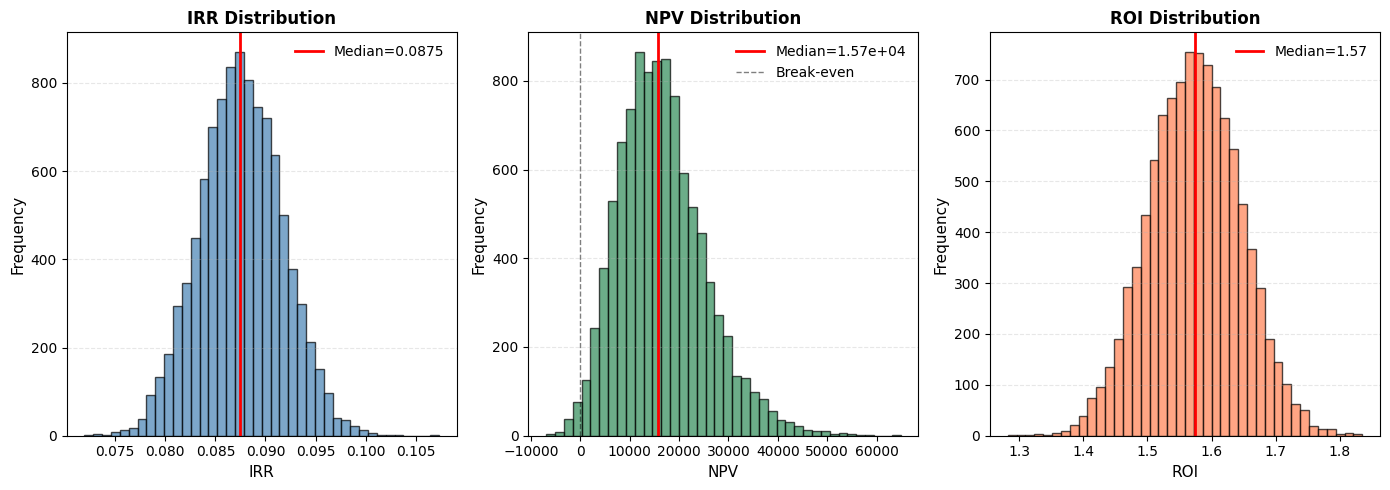

In [11]:
# Compare profitability metrics (IRR, NPV, ROI)
print("Comparing profitability metrics...")
compare_indicators(results, indicators=['IRR', 'NPV', 'ROI'], figsize=(14, 5))
plt.show()

Comparing payback periods...


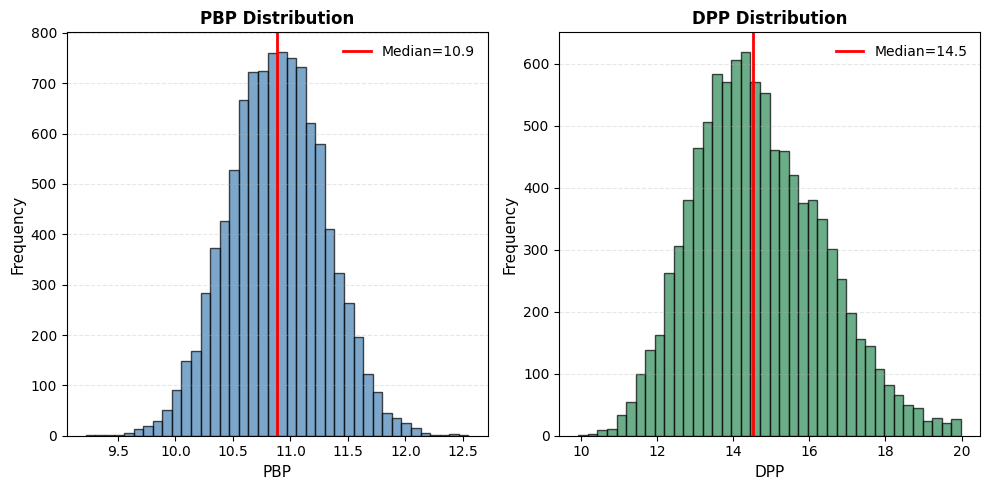

In [12]:
# Compare payback periods (PBP vs DPP)
print("Comparing payback periods...")
compare_indicators(results, indicators=['PBP', 'DPP'], figsize=(10, 5))
plt.show()

---

## ARV (After Renovation Value) Testing

Test property valuation predictions and create visualizations comparing before/after renovation values.

In [4]:
# Import ARV-related modules
# Add parent directory to path to enable proper package imports
parent_dir = Path.cwd().parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Now import using the full package path
from relife_financial.models.arv import ARVRequest, PropertyType, EnergyClass
from relife_financial.services.arv import predict_arv

print("✓ ARV modules imported successfully")

✓ ARV modules imported successfully


### Step 9: Test ARV Prediction

Predict property value after energy renovation using multiple energy class scenarios.

In [3]:
# Sample property characteristics (Athens area)
import asyncio

property_params = {
    "lat": 37.981,
    "lng": 23.728,
    "floor_area": 85.0,
    "construction_year": 1985,
    "floor_number": 2,
    "number_of_floors": 5,
    "property_type": PropertyType.APARTMENT,
    "renovated_last_5_years": True
}

print("🏠 Testing ARV Prediction with REAL MODEL")
print("="*60)
print("Property Characteristics:")
for key, value in property_params.items():
    print(f"  {key}: {value}")

# Test multiple energy class scenarios (from poor to excellent)
energy_classes_to_test = [
    EnergyClass.E,      # Poor (before renovation)
    EnergyClass.D,      # Below average
    EnergyClass.G,      # Average
    EnergyClass.B,      # Good
    EnergyClass.B_PLUS, # Very good
    EnergyClass.A,      # Excellent
    EnergyClass.A_PLUS  # Best
]

arv_results = {}

async def run_arv_predictions():
    """Run ARV predictions for all energy classes using the real LightGBM model."""
    results = {}
    for energy_class in energy_classes_to_test:
        request = ARVRequest(
            **property_params,
            energy_class=energy_class
        )
        
        response = await predict_arv(request)
        
        results[energy_class.value] = {
            "price_per_sqm": response.price_per_sqm,
            "total_price": response.total_price
        }
        
        print(f"\n{energy_class.value}:")
        print(f"  Price per m²: €{response.price_per_sqm:,.2f}")
        print(f"  Total value:  €{response.total_price:,.2f}")
    
    return results

# Run the async function with REAL model predictions
arv_results = await run_arv_predictions()

print("\n✓ ARV predictions completed using REAL LightGBM model!")

🏠 Testing ARV Prediction with REAL MODEL
Property Characteristics:
  lat: 37.981
  lng: 23.728
  floor_area: 85.0
  construction_year: 1985
  floor_number: 2
  number_of_floors: 5
  property_type: PropertyType.APARTMENT
  renovated_last_5_years: True

Ε:
  Price per m²: €3,264.24
  Total value:  €277,460.54

Δ:
  Price per m²: €3,315.51
  Total value:  €281,818.71

Γ:
  Price per m²: €3,414.12
  Total value:  €290,200.33

Β:
  Price per m²: €3,445.20
  Total value:  €292,841.64

Β+:
  Price per m²: €3,545.35
  Total value:  €301,354.66

Α:
  Price per m²: €3,567.49
  Total value:  €303,236.59

Α+:
  Price per m²: €3,637.76
  Total value:  €309,209.36

✓ ARV predictions completed using REAL LightGBM model!


c:\Users\pthoeni\AppData\Local\miniconda3\envs\APUenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: RuntimeWarning: invalid value encountered in cast
  Xi[~valid_mask] = self.categories_[i][0]
c:\Users\pthoeni\AppData\Local\miniconda3\envs\APUenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\pthoeni\AppData\Local\miniconda3\envs\APUenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\pthoeni\AppData\Local\miniconda3\envs\APUenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: RuntimeWarning: invalid value encountered in cast
  Xi[~valid_mask] = self.categories_[i][0]
c:\Users\pthoeni\AppData\Local\miniconda3\envs\APUenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: Use

### Step 10: Visualize ARV by Energy Class

Create a bar chart showing how property value increases with better energy efficiency.

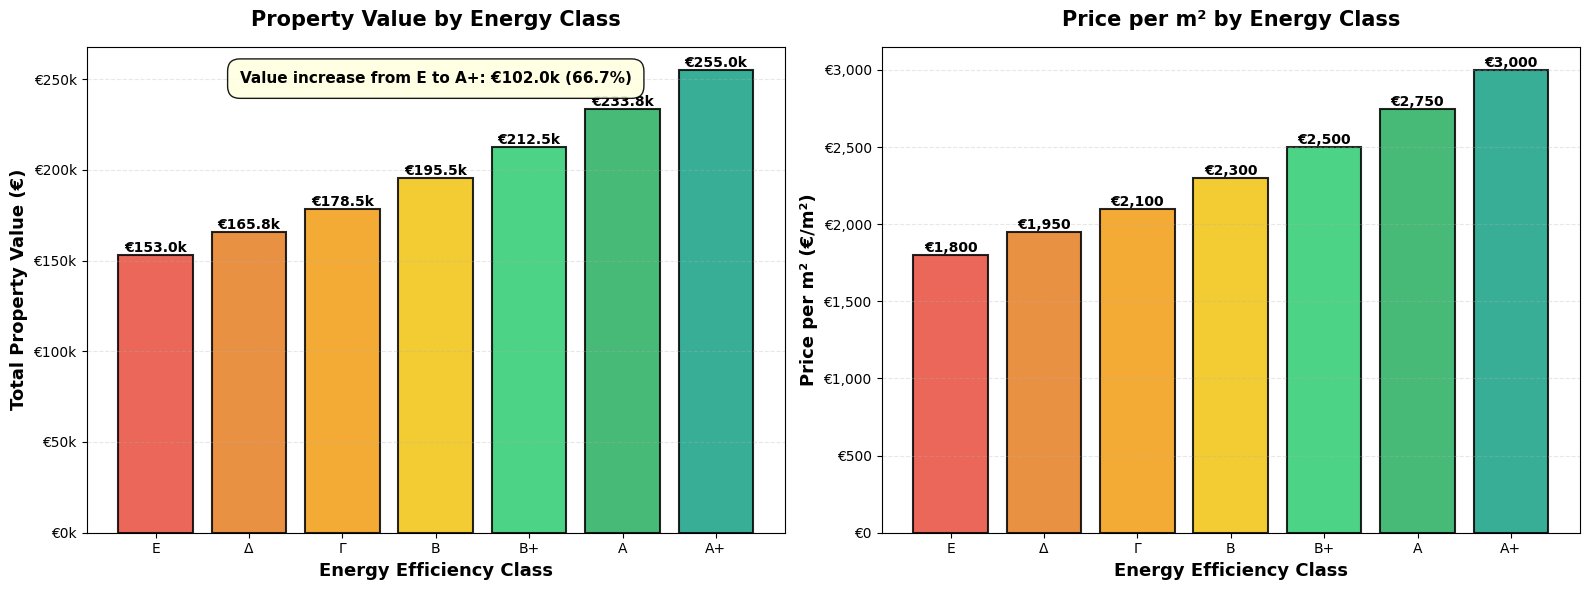


📊 ARV Analysis Summary:
  Property: 85.0 m² apartment
  Worst case (Ε): €153,000.00
  Best case (Α+):  €255,000.00
  Value gain from renovation: €102,000.00 (+66.7%)


In [7]:
# Visualize ARV across energy classes
energy_labels = list(arv_results.keys())
total_prices = [arv_results[label]["total_price"] for label in energy_labels]
price_per_sqm = [arv_results[label]["price_per_sqm"] for label in energy_labels]

# Create color gradient (red to green)
colors = ['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60', '#16a085']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Property Value
bars1 = ax1.bar(energy_labels, total_prices, color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Energy Efficiency Class', fontsize=13, fontweight='bold')
ax1.set_ylabel('Total Property Value (€)', fontsize=13, fontweight='bold')
ax1.set_title('Property Value by Energy Class', fontsize=15, fontweight='bold', pad=15)
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))

# Add value labels on bars
for bar, value in zip(bars1, total_prices):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'€{value/1000:.1f}k',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Calculate value increase from worst to best
worst_value = total_prices[0]
best_value = total_prices[-1]
value_increase = best_value - worst_value
percent_increase = (value_increase / worst_value) * 100

ax1.text(0.5, 0.95, f'Value increase from {energy_labels[0]} to {energy_labels[-1]}: €{value_increase/1000:.1f}k ({percent_increase:.1f}%)',
         transform=ax1.transAxes, ha='center', va='top',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='lightyellow', alpha=0.9),
         fontsize=11, fontweight='bold')

# Plot 2: Price per Square Meter
bars2 = ax2.bar(energy_labels, price_per_sqm, color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Energy Efficiency Class', fontsize=13, fontweight='bold')
ax2.set_ylabel('Price per m² (€/m²)', fontsize=13, fontweight='bold')
ax2.set_title('Price per m² by Energy Class', fontsize=15, fontweight='bold', pad=15)
ax2.grid(True, axis='y', linestyle='--', alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Add value labels on bars
for bar, value in zip(bars2, price_per_sqm):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'€{value:,.0f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 ARV Analysis Summary:")
print(f"  Property: {property_params['floor_area']} m² apartment")
print(f"  Worst case ({energy_labels[0]}): €{worst_value:,.2f}")
print(f"  Best case ({energy_labels[-1]}):  €{best_value:,.2f}")
print(f"  Value gain from renovation: €{value_increase:,.2f} (+{percent_increase:.1f}%)")

### Step 11: ROI Comparison - Renovation Cost vs Property Value Gain

Compare the cost of renovation (from previous simulation) with the property value increase.

In [ ]:
# Create comprehensive ROI visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Assume renovation upgrades from E (poor) to B+ (very good)
before_energy = "Ε"  # Class E
after_energy = "Β+"  # Class B+

property_value_before = arv_results[before_energy]["total_price"]
property_value_after = arv_results[after_energy]["total_price"]
property_value_gain = property_value_after - property_value_before

renovation_cost = test_params["capex"]  # €60,000 from earlier simulation
net_financial_benefit = results['summary']['percentiles']['NPV']['P50']  # Median NPV from risk assessment

# Plot 1: Property Value Before vs After
ax1 = axes[0, 0]
categories = ['Before\nRenovation', 'After\nRenovation']
values = [property_value_before, property_value_after]
colors_ba = ['#e74c3c', '#27ae60']
bars = ax1.bar(categories, values, color=colors_ba, alpha=0.8, edgecolor='black', linewidth=2)

for bar, value in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'€{value/1000:.1f}k',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax1.set_ylabel('Property Value (€)', fontsize=12, fontweight='bold')
ax1.set_title(f'Property Value Comparison\n({before_energy} → {after_energy})', 
              fontsize=14, fontweight='bold', pad=15)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))
ax1.grid(True, axis='y', alpha=0.3)

# Add gain annotation
ax1.annotate(f'+€{property_value_gain/1000:.1f}k',
            xy=(1, property_value_after), xytext=(0.5, property_value_after + 10000),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=13, fontweight='bold', color='green',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

# Plot 2: Cost-Benefit Breakdown
ax2 = axes[0, 1]
components = ['Renovation\nCost', 'Property\nValue Gain', 'NPV (20yr)\nCash Flows']
component_values = [renovation_cost, property_value_gain, net_financial_benefit]
component_colors = ['#e74c3c', '#27ae60', '#3498db']

bars = ax2.bar(components, component_values, color=component_colors, alpha=0.8, edgecolor='black', linewidth=2)

for bar, value in zip(bars, component_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'€{value/1000:.1f}k',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Amount (€)', fontsize=12, fontweight='bold')
ax2.set_title('Investment Components', fontsize=14, fontweight='bold', pad=15)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))
ax2.grid(True, axis='y', alpha=0.3)

# Plot 3: ROI Metrics
ax3 = axes[1, 0]
total_benefit = property_value_gain + net_financial_benefit
net_gain = total_benefit - renovation_cost
roi_percent = (total_benefit / renovation_cost) * 100

metrics = ['Total\nBenefit', 'Renovation\nCost', 'Net\nGain']
metric_values = [total_benefit, -renovation_cost, net_gain]
metric_colors = ['#27ae60' if v >= 0 else '#e74c3c' for v in metric_values]

bars = ax3.bar(metrics, metric_values, color=metric_colors, alpha=0.8, edgecolor='black', linewidth=2)

for bar, value in zip(bars, metric_values):
    height = bar.get_height()
    va = 'bottom' if value >= 0 else 'top'
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'€{abs(value)/1000:.1f}k',
            ha='center', va=va, fontsize=11, fontweight='bold')

ax3.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax3.set_ylabel('Amount (€)', fontsize=12, fontweight='bold')
ax3.set_title(f'Total ROI Analysis\nROI: {roi_percent:.1f}%', 
              fontsize=14, fontweight='bold', pad=15)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))
ax3.grid(True, axis='y', alpha=0.3)

# Plot 4: Summary Metrics Table
ax4 = axes[1, 1]
ax4.axis('off')

summary_data = [
    ['Metric', 'Value'],
    ['─'*40, '─'*20],
    ['Renovation Cost (CAPEX)', f'€{renovation_cost:,.0f}'],
    ['Property Value Gain', f'€{property_value_gain:,.0f}'],
    ['20-Year Cash Flow NPV', f'€{net_financial_benefit:,.0f}'],
    ['', ''],
    ['Total Benefit', f'€{total_benefit:,.0f}'],
    ['Net Gain', f'€{net_gain:,.0f}'],
    ['ROI', f'{roi_percent:.1f}%'],
    ['', ''],
    ['Energy Class Change', f'{before_energy} → {after_energy}'],
    ['Property Size', f'{property_params["floor_area"]:.0f} m²'],
    ['Project Timeline', f'{test_params["project_lifetime"]} years'],
]

table = ax4.table(cellText=summary_data, cellLoc='left', loc='center',
                 colWidths=[0.6, 0.4],
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header row
for i in range(2):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style key metrics
for row in [6, 7, 8]:  # Total Benefit, Net Gain, ROI rows
    for col in range(2):
        table[(row, col)].set_facecolor('#d5f4e6')
        table[(row, col)].set_text_props(weight='bold')

ax4.set_title('Investment Summary', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Comprehensive Renovation ROI Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPREHENSIVE ROI SUMMARY")
print("="*60)
print(f"Investment: €{renovation_cost:,.2f}")
print(f"Property value increase: €{property_value_gain:,.2f}")
print(f"20-year cash flow NPV: €{net_financial_benefit:,.2f}")
print(f"─"*60)
print(f"Total benefit: €{total_benefit:,.2f}")
print(f"Net gain: €{net_gain:,.2f}")
print(f"ROI: {roi_percent:.1f}%")

### Step 12: Generate ARV Visualizations for API Response

Create base64-encoded images for professional output.

In [ ]:
# Import required modules for base64 encoding
import base64
from io import BytesIO

# Function to generate ARV visualization as base64
def generate_arv_chart_base64(arv_results_dict, property_area, return_base64=True):
    """Generate ARV comparison chart and optionally return as base64."""
    energy_labels = list(arv_results_dict.keys())
    total_prices = [arv_results_dict[label]["total_price"] for label in energy_labels]
    
    colors = ['#e74c3c', '#e67e22', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60', '#16a085']
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars = ax.bar(energy_labels, total_prices, color=colors, alpha=0.85, 
                   edgecolor='black', linewidth=1.5)
    
    ax.set_xlabel('Energy Efficiency Class', fontsize=13, fontweight='bold')
    ax.set_ylabel('Property Value (€)', fontsize=13, fontweight='bold')
    ax.set_title(f'Property Valuation by Energy Class ({property_area}m²)', 
                 fontsize=15, fontweight='bold', pad=15)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))
    
    # Add value labels
    for bar, value in zip(bars, total_prices):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'€{value/1000:.1f}k',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add value increase annotation
    worst_value = total_prices[0]
    best_value = total_prices[-1]
    value_increase = best_value - worst_value
    percent_increase = (value_increase / worst_value) * 100
    
    ax.text(0.5, 0.95, 
            f'Maximum value increase: €{value_increase/1000:.1f}k ({percent_increase:.1f}%)',
            transform=ax.transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='lightyellow', alpha=0.9),
            fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    
    if return_base64:
        buffer = BytesIO()
        fig.savefig(buffer, format='png', dpi=100, bbox_inches='tight')
        buffer.seek(0)
        img_base64 = base64.b64encode(buffer.read()).decode('utf-8')
        plt.close(fig)
        return f"data:image/png;base64,{img_base64}"
    else:
        return fig

# Generate base64-encoded ARV chart
print("Generating base64-encoded ARV chart...")
arv_chart_base64 = generate_arv_chart_base64(
    arv_results, 
    property_params['floor_area'],
    return_base64=True
)

print(f"✓ ARV chart generated: {len(arv_chart_base64)} characters")
print(f"  Preview: {arv_chart_base64[:80]}...")
print(f"  Size: ~{len(arv_chart_base64) / 1024:.1f} KB")